In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Introduction

Pada Final Project ini saya menggunakan data penjualan dari toko retail untuk membuat machine learning algoritma untuk mempredik target marketing iklan produk berdasarkan customer behavior agar tim marketing tepat sasaran.
customer behavior = feature.

# Data Cleaning

In [2]:
# membaca dataset 
df = pd.read_csv("retailMarketingDI.csv")

# menampilkan sample data
df

,Age,Gender,OwnHome,Married,Location,Salary,Children,History,Catalogs,AmountSpent
0,Old,Female,Own,Single,Far,47500,0,High,6,755.0
1,Middle,Male,Rent,Single,Close,63600,0,High,6,1318.0
2,Young,Female,Rent,Single,Close,13500,0,Low,18,296.0
3,Middle,Male,Own,Married,Close,85600,1,High,18,2436.0
4,Middle,Female,Own,Single,Close,68400,0,High,12,1304.0
...,...,...,...,...,...,...,...,...,...,...
995,Young,Female,Rent,Single,Close,19400,1,NaN,18,384.0
996,Middle,Male,Rent,Single,Far,40500,1,NaN,18,1073.0
997,Old,Male,Own,Single,Close,44800,0,Medium,24,1417.0
998,Middle,Male,Own,Married,Close,79000,2,Medium,18,671.0


10 Features in this dataset consist:
1. <b>Age</b>: Customer age in years
2. <b>Gender</b>: Customer gender
3. <b>OwnHome</b>: Data shows that customer have their own house or not
4. <b>Married</b>: Customer marital status
5. <b>Location</b>: Data shows customer location range
6. <b>Salary</b>: Customer annual income (yearly bcs it show average salary per year in the US)
7. <b>Children</b>: Data shows if customer have how many children or have none
8. <b>History</b>: Remain Unknown
9. <b>Catalogs</b>: Unknown
10. <b>AmountSpent</b>: Customer Spending Score

In [3]:
df.shape

(1000, 10)

In [4]:
df.describe()

,Salary,Children,Catalogs,AmountSpent
count,1000.000000,1000.00000,1000.000000,994.000000
mean,55916.600000,0.93400,14.682000,1218.188129
std,30748.392284,1.05107,6.622895,961.849079
min,0.000000,0.00000,6.000000,0.000000
25%,29200.000000,0.00000,6.000000,490.250000
50%,53700.000000,1.00000,12.000000,962.500000
75%,76925.000000,2.00000,18.000000,1688.750000
max,168800.000000,3.00000,24.000000,6217.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
Age            1000 non-null object
Gender         1000 non-null object
OwnHome        1000 non-null object
Married        1000 non-null object
Location       1000 non-null object
Salary         1000 non-null int64
Children       1000 non-null int64
History        697 non-null object
Catalogs       1000 non-null int64
AmountSpent    994 non-null float64
dtypes: float64(1), int64(3), object(6)
memory usage: 78.2+ KB


### Null Values Check

In [6]:
df.isna().sum()

Age              0
Gender           0
OwnHome          0
Married          0
Location         0
Salary           0
Children         0
History        303
Catalogs         0
AmountSpent      6
dtype: int64

Since History is not really affect to build the model, and by chance have a lot of nan values, then i decided to drop whole column to make the data clean.

In [7]:
df = df.drop(['History'], axis=1)
df

,Age,Gender,OwnHome,Married,Location,Salary,Children,Catalogs,AmountSpent
0,Old,Female,Own,Single,Far,47500,0,6,755.0
1,Middle,Male,Rent,Single,Close,63600,0,6,1318.0
2,Young,Female,Rent,Single,Close,13500,0,18,296.0
3,Middle,Male,Own,Married,Close,85600,1,18,2436.0
4,Middle,Female,Own,Single,Close,68400,0,12,1304.0
...,...,...,...,...,...,...,...,...,...
995,Young,Female,Rent,Single,Close,19400,1,18,384.0
996,Middle,Male,Rent,Single,Far,40500,1,18,1073.0
997,Old,Male,Own,Single,Close,44800,0,24,1417.0
998,Middle,Male,Own,Married,Close,79000,2,18,671.0


Catalogs remain unknown because this dataset did not mention what is the catalog is. To make the data cleaner, i decided to drop the whole column too.

In [8]:
df = df.drop(['Catalogs'], axis=1)
df

,Age,Gender,OwnHome,Married,Location,Salary,Children,AmountSpent
0,Old,Female,Own,Single,Far,47500,0,755.0
1,Middle,Male,Rent,Single,Close,63600,0,1318.0
2,Young,Female,Rent,Single,Close,13500,0,296.0
3,Middle,Male,Own,Married,Close,85600,1,2436.0
4,Middle,Female,Own,Single,Close,68400,0,1304.0
...,...,...,...,...,...,...,...,...
995,Young,Female,Rent,Single,Close,19400,1,384.0
996,Middle,Male,Rent,Single,Far,40500,1,1073.0
997,Old,Male,Own,Single,Close,44800,0,1417.0
998,Middle,Male,Own,Married,Close,79000,2,671.0


Making Nan Values in AmountSpent feature to 0 because it has no information at all to fill the amountspent. So i decided to make it 0 since it only has 6 Nan Values

In [9]:
df['AmountSpent'] = df['AmountSpent'].fillna(0)

In [10]:
df.isna().sum()

Age            0
Gender         0
OwnHome        0
Married        0
Location       0
Salary         0
Children       0
AmountSpent    0
dtype: int64

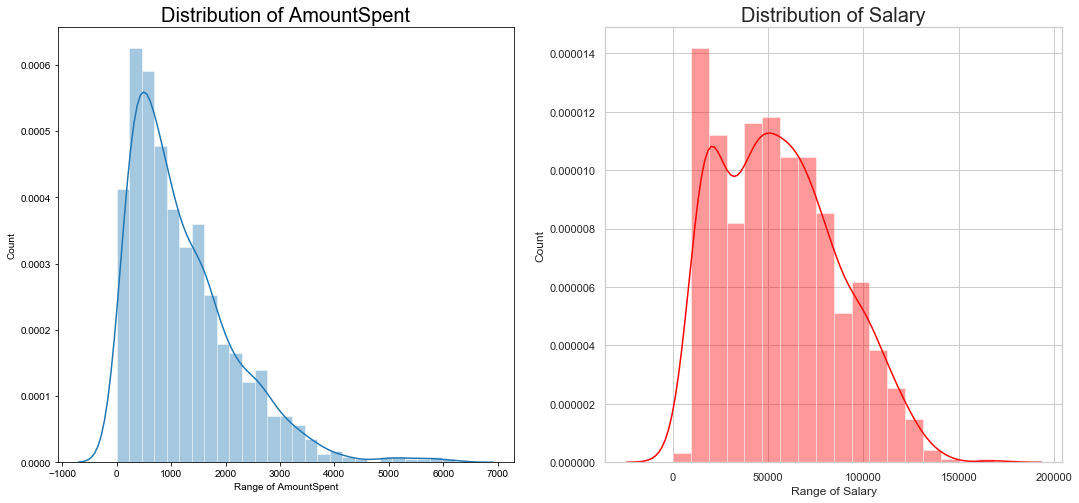

In [11]:
import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = (18, 8)

plt.subplot(1, 2, 1)
sns.set(style = 'whitegrid')
sns.distplot(df['AmountSpent'])
plt.title('Distribution of AmountSpent', fontsize = 20)
plt.xlabel('Range of AmountSpent')
plt.ylabel('Count')


plt.subplot(1, 2, 2)
sns.set(style = 'whitegrid')
sns.distplot(df['Salary'], color = 'red')
plt.title('Distribution of Salary', fontsize = 20)
plt.xlabel('Range of Salary')
plt.ylabel('Count')
plt.show()

### EDA

In [12]:
df.describe()

,Salary,Children,AmountSpent
count,1000.000000,1000.00000,1000.000000
mean,55916.600000,0.93400,1210.879000
std,30748.392284,1.05107,963.564478
min,0.000000,0.00000,0.000000
25%,29200.000000,0.00000,480.500000
50%,53700.000000,1.00000,957.500000
75%,76925.000000,2.00000,1672.250000
max,168800.000000,3.00000,6217.000000


From above we can see that the average customer salary that spend their money in the store is 55917 dollars per year.
The average of the AmountSpent is 1210 dollar.

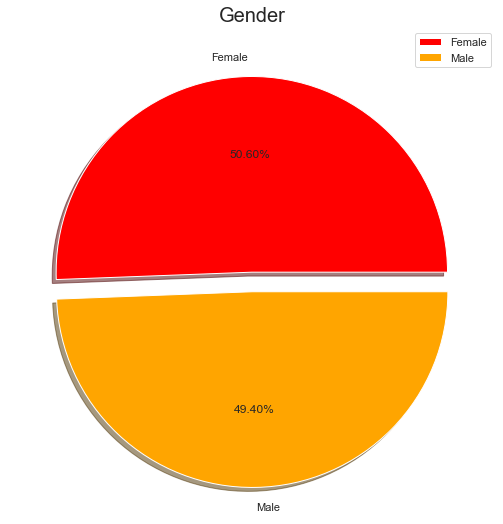

In [13]:
labels = ['Female', 'Male']
size = df['Gender'].value_counts()
colors = ['red', 'orange']
explode = [0, 0.1]

plt.rcParams['figure.figsize'] = (9, 9)
plt.pie(size, colors = colors, explode = explode, labels = labels, shadow = True, autopct = '%.2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')
plt.legend()
plt.show()

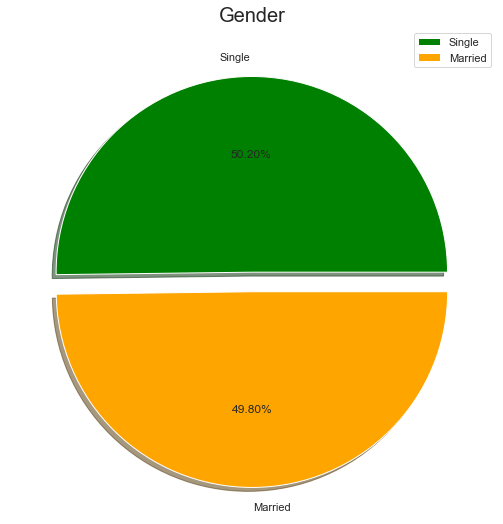

In [14]:
labels = ['Single', 'Married']
size = df['Married'].value_counts()
colors = ['green', 'orange']
explode = [0, 0.1]

plt.rcParams['figure.figsize'] = (9, 9)
plt.pie(size, colors = colors, explode = explode, labels = labels, shadow = True, autopct = '%.2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')
plt.legend()
plt.show()

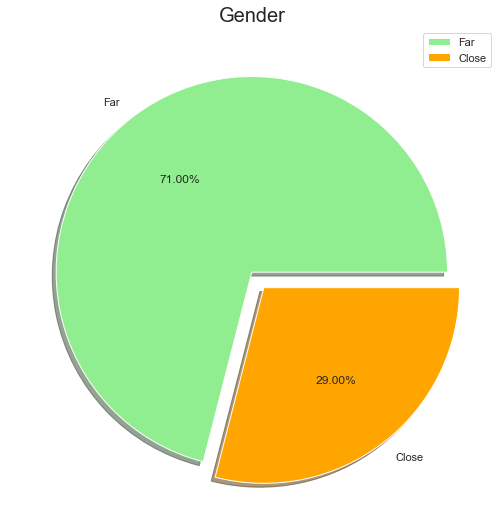

In [15]:
labels = ['Far', 'Close']
size = df['Location'].value_counts()
colors = ['lightgreen', 'orange']
explode = [0, 0.1]

plt.rcParams['figure.figsize'] = (9, 9)
plt.pie(size, colors = colors, explode = explode, labels = labels, shadow = True, autopct = '%.2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')
plt.legend()
plt.show()

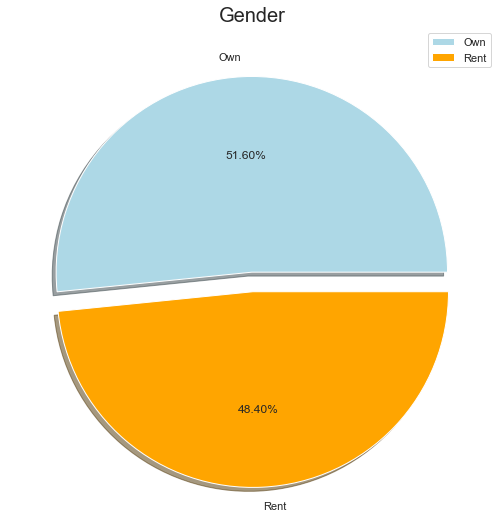

In [16]:
labels = ['Own', 'Rent']
size = df['OwnHome'].value_counts()
colors = ['lightblue', 'orange']
explode = [0, 0.1]

plt.rcParams['figure.figsize'] = (9, 9)
plt.pie(size, colors = colors, explode = explode, labels = labels, shadow = True, autopct = '%.2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')
plt.legend()
plt.show()

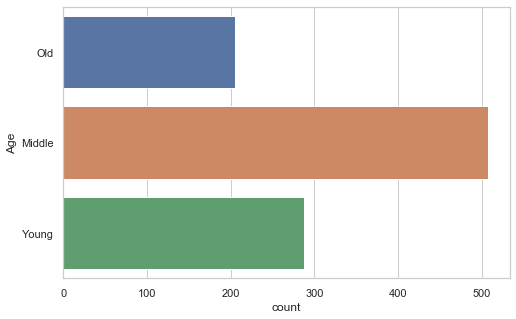

In [17]:
plt.figure(1 , figsize = (8 , 5))
sns.countplot(y = 'Age' , data = df)
plt.show()

### Making Target Feature

Since the data is now clean, im gonna make a target feature to make the classfication model can work. The target feature i choose will be the AmountSpent. I will see the MEDIAN of it and i split it to 2 sections. High(1) and low(0).

In [18]:
pd.crosstab(df['AmountSpent'], columns='count').sort_values('count', ascending=False)

col_0,count
AmountSpent,
0.0,8
1162.0,4
576.0,4
143.0,3
202.0,3
...,...
802.0,1
805.0,1
808.0,1


In [19]:
df['AmountSpent'].sort_values().unique()

array([   0.,   38.,   43.,   62.,   65.,   79.,   87.,   90.,   93.,
        105.,  106.,  107.,  108.,  114.,  123.,  127.,  136.,  139.,
        140.,  143.,  147.,  153.,  157.,  158.,  160.,  161.,  163.,
        164.,  166.,  167.,  170.,  172.,  173.,  176.,  177.,  180.,
        182.,  183.,  184.,  188.,  189.,  191.,  192.,  193.,  194.,
        195.,  197.,  199.,  200.,  201.,  202.,  205.,  206.,  209.,
        210.,  212.,  213.,  216.,  218.,  220.,  222.,  223.,  224.,
        225.,  227.,  229.,  230.,  232.,  233.,  235.,  236.,  239.,
        241.,  242.,  243.,  245.,  247.,  250.,  252.,  258.,  260.,
        264.,  268.,  269.,  271.,  273.,  274.,  275.,  276.,  278.,
        280.,  281.,  286.,  289.,  292.,  295.,  296.,  297.,  301.,
        303.,  304.,  307.,  308.,  312.,  314.,  316.,  317.,  319.,
        320.,  321.,  322.,  324.,  326.,  328.,  329.,  330.,  332.,
        333.,  340.,  341.,  342.,  344.,  345.,  348.,  349.,  356.,
        357.,  358.,

In [20]:
median = df['AmountSpent'].median()
median

957.5

Based on MEDIAN on AmountSpent feature, we can see 957.5 dollars will be the references of the limit between the High AmounSpent and Low AmountSpent. The High AmountSpent will the main focus to be the main target of the marketing team to add more ads etc to increase sales.

In [21]:
df['AmountSpent'].max()

6217.0

In [22]:
df['amountspent'] = pd.cut(x=df['AmountSpent'], bins=[0, 957.5, 6219], labels=['Low', 'High'], right=False)

print(df['amountspent'].unique())

[Low, High]
Categories (2, object): [Low < High]


In [23]:
print(df['amountspent'].unique())

[Low, High]
Categories (2, object): [Low < High]


In [24]:
df

,Age,Gender,OwnHome,Married,Location,Salary,Children,AmountSpent,amountspent
0,Old,Female,Own,Single,Far,47500,0,755.0,Low
1,Middle,Male,Rent,Single,Close,63600,0,1318.0,High
2,Young,Female,Rent,Single,Close,13500,0,296.0,Low
3,Middle,Male,Own,Married,Close,85600,1,2436.0,High
4,Middle,Female,Own,Single,Close,68400,0,1304.0,High
...,...,...,...,...,...,...,...,...,...
995,Young,Female,Rent,Single,Close,19400,1,384.0,Low
996,Middle,Male,Rent,Single,Far,40500,1,1073.0,High
997,Old,Male,Own,Single,Close,44800,0,1417.0,High
998,Middle,Male,Own,Married,Close,79000,2,671.0,Low


### Label Encoding AmountSpent 

Label encoding AmountSpent is to making the Feature to be the target. Consisting of 0(HIGH) and 1(LOW)

In [25]:
df['amountspent'].value_counts()

High    500
Low     500
Name: amountspent, dtype: int64

In [26]:
from sklearn.preprocessing import LabelEncoder

df['AmountSpent_encoded'] = LabelEncoder().fit_transform(df['amountspent'])
df.head()

,Age,Gender,OwnHome,Married,Location,Salary,Children,AmountSpent,amountspent,AmountSpent_encoded
0,Old,Female,Own,Single,Far,47500,0,755.0,Low,1
1,Middle,Male,Rent,Single,Close,63600,0,1318.0,High,0
2,Young,Female,Rent,Single,Close,13500,0,296.0,Low,1
3,Middle,Male,Own,Married,Close,85600,1,2436.0,High,0
4,Middle,Female,Own,Single,Close,68400,0,1304.0,High,0


Droping the feature that not neccesary anymore.

In [27]:
df = df.drop(['AmountSpent','amountspent'], axis=1)
df.rename(columns = {'AmountSpent_encoded':'AmountSpent'}, inplace = True)
df

,Age,Gender,OwnHome,Married,Location,Salary,Children,AmountSpent
0,Old,Female,Own,Single,Far,47500,0,1
1,Middle,Male,Rent,Single,Close,63600,0,0
2,Young,Female,Rent,Single,Close,13500,0,1
3,Middle,Male,Own,Married,Close,85600,1,0
4,Middle,Female,Own,Single,Close,68400,0,0
...,...,...,...,...,...,...,...,...
995,Young,Female,Rent,Single,Close,19400,1,1
996,Middle,Male,Rent,Single,Far,40500,1,0
997,Old,Male,Own,Single,Close,44800,0,0
998,Middle,Male,Own,Married,Close,79000,2,1


**Label Encoding the rest of feature to make it correlationable**

In [28]:
df['married'] = LabelEncoder().fit_transform(df[['Married']])
df = df.drop(['Married'], axis=1)

In [29]:
# 1 Single, 0 Married
df

,Age,Gender,OwnHome,Location,Salary,Children,AmountSpent,married
0,Old,Female,Own,Far,47500,0,1,1
1,Middle,Male,Rent,Close,63600,0,0,1
2,Young,Female,Rent,Close,13500,0,1,1
3,Middle,Male,Own,Close,85600,1,0,0
4,Middle,Female,Own,Close,68400,0,0,1
...,...,...,...,...,...,...,...,...
995,Young,Female,Rent,Close,19400,1,1,1
996,Middle,Male,Rent,Far,40500,1,0,1
997,Old,Male,Own,Close,44800,0,0,1
998,Middle,Male,Own,Close,79000,2,1,0


In [30]:
df['gender'] = LabelEncoder().fit_transform(df[['Gender']])
df = df.drop(['Gender'], axis=1)

In [31]:
# 0 Female, 1 Male
df

,Age,OwnHome,Location,Salary,Children,AmountSpent,married,gender
0,Old,Own,Far,47500,0,1,1,0
1,Middle,Rent,Close,63600,0,0,1,1
2,Young,Rent,Close,13500,0,1,1,0
3,Middle,Own,Close,85600,1,0,0,1
4,Middle,Own,Close,68400,0,0,1,0
...,...,...,...,...,...,...,...,...
995,Young,Rent,Close,19400,1,1,1,0
996,Middle,Rent,Far,40500,1,0,1,1
997,Old,Own,Close,44800,0,0,1,1
998,Middle,Own,Close,79000,2,1,0,1


In [32]:
df['location'] = LabelEncoder().fit_transform(df[['Location']])
df = df.drop(['Location'], axis=1)

In [33]:
# 1 Far , 0 Close
df

,Age,OwnHome,Salary,Children,AmountSpent,married,gender,location
0,Old,Own,47500,0,1,1,0,1
1,Middle,Rent,63600,0,0,1,1,0
2,Young,Rent,13500,0,1,1,0,0
3,Middle,Own,85600,1,0,0,1,0
4,Middle,Own,68400,0,0,1,0,0
...,...,...,...,...,...,...,...,...
995,Young,Rent,19400,1,1,1,0,0
996,Middle,Rent,40500,1,0,1,1,1
997,Old,Own,44800,0,0,1,1,0
998,Middle,Own,79000,2,1,0,1,0


In [34]:
df['ownhome'] = LabelEncoder().fit_transform(df[['OwnHome']])
df = df.drop(['OwnHome'], axis=1)

In [35]:
# 0 own, 1 rent
df

,Age,Salary,Children,AmountSpent,married,gender,location,ownhome
0,Old,47500,0,1,1,0,1,0
1,Middle,63600,0,0,1,1,0,1
2,Young,13500,0,1,1,0,0,1
3,Middle,85600,1,0,0,1,0,0
4,Middle,68400,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...
995,Young,19400,1,1,1,0,0,1
996,Middle,40500,1,0,1,1,1,1
997,Old,44800,0,0,1,1,0,0
998,Middle,79000,2,1,0,1,0,0


In [36]:
df['age'] = LabelEncoder().fit_transform(df[['Age']])
df = df.drop(['Age'], axis=1)

In [37]:
# old 1, 0 Middle, 2 Young
df

,Salary,Children,AmountSpent,married,gender,location,ownhome,age
0,47500,0,1,1,0,1,0,1
1,63600,0,0,1,1,0,1,0
2,13500,0,1,1,0,0,1,2
3,85600,1,0,0,1,0,0,0
4,68400,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...
995,19400,1,1,1,0,0,1,2
996,40500,1,0,1,1,1,1,0
997,44800,0,0,1,1,0,0,1
998,79000,2,1,0,1,0,0,0


In [39]:
df.corr().abs()['AmountSpent'].sort_values(ascending = False)

AmountSpent    1.000000
Salary         0.616028
married        0.432003
age            0.417918
ownhome        0.328168
gender         0.236017
Children       0.232260
location       0.154266
Name: AmountSpent, dtype: float64

from the correlation above, we can see that salary is the most affect to the AmountSpent of the customer

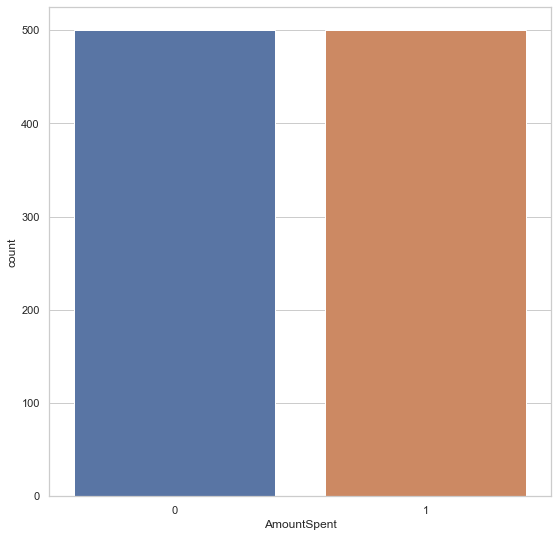

In [40]:
sns.countplot(x = 'AmountSpent',data=df)

# MODELING

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

import warnings
warnings.filterwarnings("ignore")

### Splitting Dataset

In [43]:
x = df.drop(['AmountSpent'], axis=1)
y = df['AmountSpent']

In [45]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, shuffle=False)

In [46]:
model_LogReg_Asli = LogisticRegression()
model_LogReg_Asli.fit(x_train, y_train)
print(model_LogReg_Asli.coef_)
print(model_LogReg_Asli.intercept_)

m = model_LogReg_Asli.coef_[0][0]
c = model_LogReg_Asli.intercept_[0]

[[-4.32755095e-05  8.72318672e-01  5.34799196e-01  5.62510921e-02
   1.86109292e-02  4.65259073e-01  8.76109212e-01]]
[0.46794586]


In [47]:
# prediksi
y_pred = model_LogReg_Asli.predict(x_test) 

In [48]:
# model performances
model_LogReg_Asli.score(x_train, y_train)

0.82

In [49]:
# Parameter yang dipakai di model asli
model_LogReg_Asli.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [50]:
# parameter model linear regression yang akan dituned + nilai yang mungkin

penalty = ['l1', 'l2', 'elasticnet', 'none']
solver = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
max_iter = [1, 10, 100, 1000, 10000]

param = {'penalty': penalty, 'solver': solver, 'max_iter': max_iter}
param

{'penalty': ['l1', 'l2', 'elasticnet', 'none'],
 'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
 'max_iter': [1, 10, 100, 1000, 10000]}

### Randomized Search CV

In [51]:
# mencari parameter terbaik pada model: logistic regression

from sklearn.model_selection import RandomizedSearchCV
model_LR = LogisticRegression()
model_LR_RS = RandomizedSearchCV(
    estimator = model_LR, param_distributions= param, cv = 5
)

# model_LR2_GS = GridSearchCV( model_LR2, param, cv=5, error_score=0.0)

In [52]:
model_LR_RS.fit(x_train, y_train)
model_LR_RS.best_params_

{'solver': 'liblinear', 'penalty': 'l1', 'max_iter': 10}

In [53]:
model_LogReg_Asli.score(x_test, y_test)

0.775

In [55]:
model_LogReg_Baru = LogisticRegression(solver='liblinear', penalty = 'l1', max_iter = 10)

model_LogReg_Baru.fit(x_train, y_train)
model_LogReg_Baru.score(x_test, y_test)

0.785

### Grid CV

In [67]:
from sklearn.model_selection import GridSearchCV
model_LR2 = LogisticRegression()
model_LR2_GS = GridSearchCV(
    model_LR2, param, cv = 5
)

In [68]:
model_LR2_GS.fit(x_train, y_train)
model_LR2_GS.best_params_

{'max_iter': 10, 'penalty': 'l1', 'solver': 'liblinear'}

In [58]:
model_LogReg_Asli.score(x_test, y_test)

0.775

In [66]:
model_LogReg_Baru_2 = LogisticRegression(solver='liblinear', penalty = '11', max_iter = 100)

model_LogReg_Baru_2.fit(x_train, y_train)
model_LogReg_Baru_2.score(x_test, y_test)

ValueError: Logistic Regression supports only penalties in ['l1', 'l2', 'elasticnet', 'none'], got 11.